In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from processing import processing

dfs = processing(f'Data')

In [2]:
from model_scripts.LSTM import Model_LSTM

scaler = StandardScaler()

all_data = np.concatenate([dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1).to_numpy() for year in range(2021, 2025)], axis=0)
scaler.fit(all_data)

for year in range(2021, 2024):
    
    X = (dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1)).to_numpy()
    y =(dfs[f'Data\\{year}']['PtsNextGame']).to_numpy()
    
    X = X.reshape((X.shape[0], X.shape[1]))
    y = y.reshape(y.shape[0], 1)

    X_normalized = scaler.transform(X)

    num_features = X_normalized.shape[1]

    X_normalized = X_normalized.reshape((X_normalized.shape[0], 1, num_features))  # Shape: (samples, time_steps, features)
    
    Model_LSTM.fit(X_normalized, y, epochs=100)

Model_LSTM.save('Models/Model_LSTM.keras')

Epoch 1/100


C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 99.7357
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.6364 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.0648 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.1692 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.5859 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.8335 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.0513 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.2800 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.0392 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.3217 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.5198 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.9894 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.5106 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.8278 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.3486 
Epoch 16/100
3/3 

In [3]:
X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Shape: (samples, time_steps, features)

y_test = dfs['Data\\2024']['PtsNextGame']

predictions = Model_LSTM.predict(X_test)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


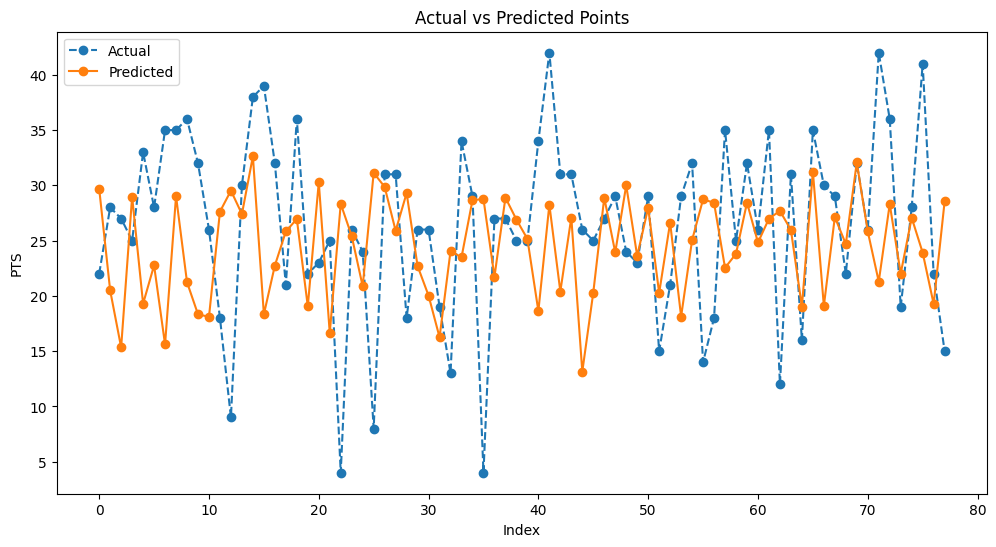

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions.reshape(predictions.shape[0], predictions.shape[1]), label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.7544  
48.40970230102539
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

496.8187713623047


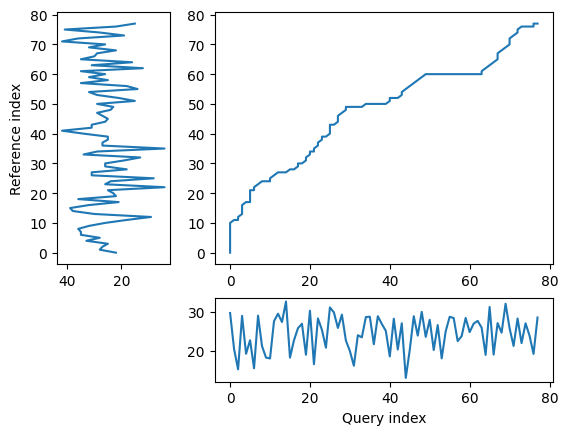

In [5]:
print(Model_LSTM.evaluate(X_test, y_test))

from dtw import *

query = predictions.reshape(predictions.shape[0], predictions.shape[1])
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

print(alignment.distance)

In [6]:
from model_scripts.GRU import Model_GRU

for year in range(2021, 2024):

    X = (dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1)).to_numpy()
    y =(dfs[f'Data\\{year}']['PtsNextGame']).to_numpy()

    X = scaler.transform(X)

    X = X.reshape((X.shape[0], 1, X.shape[1]))
    y = y.reshape(y.shape[0], 1)

    Model_GRU.fit(X, y, epochs=100)

Model_GRU.save('Models/Model_GRU.keras')

Epoch 1/100


C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 99.4269 - mae: 26.0240
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.3646 - mae: 23.9036 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.1915 - mae: 19.1503 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.8876 - mae: 13.5667 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.5504 - mae: 9.2900 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.1460 - mae: 7.0195 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9125 - mae: 7.2542 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9564 - mae: 7.0275 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.6918 - mae: 7.2940 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.6003 - mae: 7.6872 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3591 - mae: 8.3146 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.1848 - mae: 8.8837  
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

In [7]:
X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Shape: (samples, time_steps, features)

y_test = dfs['Data\\2024']['PtsNextGame']

predictions = Model_GRU.predict(X_test)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


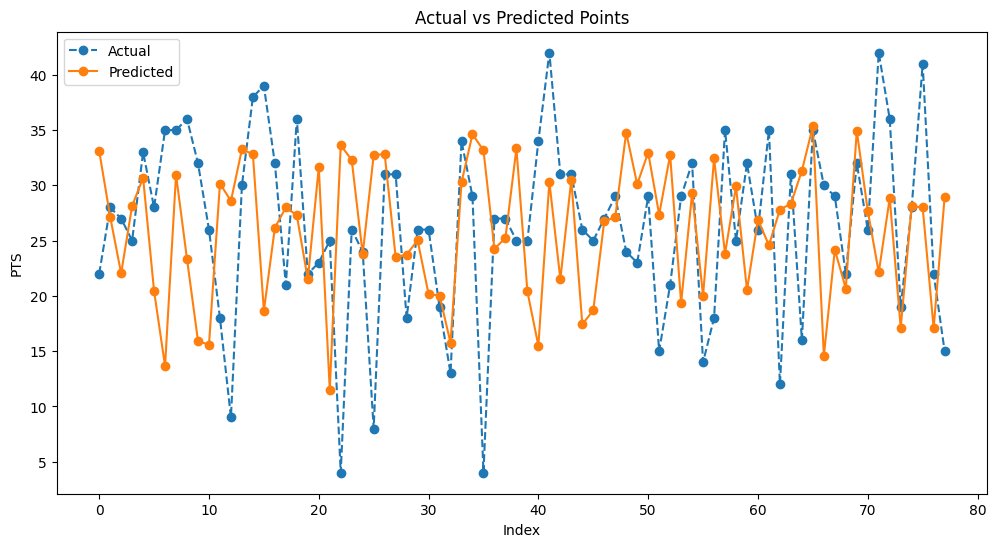

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions.reshape(predictions.shape[0], predictions.shape[1]), label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.7544 
48.40970230102539
505.7265338897705


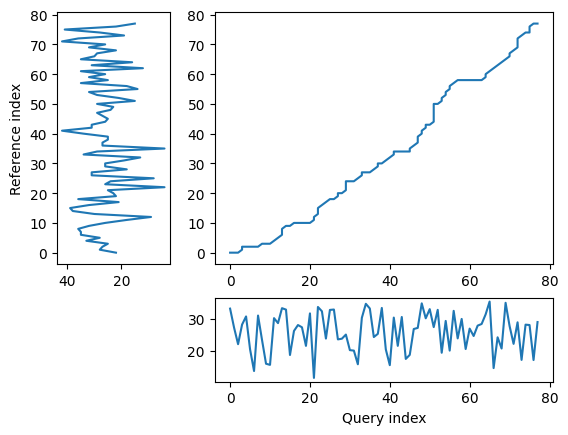

In [9]:
print(Model_LSTM.evaluate(X_test, y_test))

from dtw import *

query = predictions.reshape(predictions.shape[0], predictions.shape[1])
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

print(alignment.distance)

In [10]:
from model_scripts.CNN import Model_CNN

for year in range(2021, 2024):
    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1).to_numpy()
    y = dfs[f'Data\\{year}']['PtsNextGame'].to_numpy()

    X = scaler.transform(X)

    X = X.reshape((X.shape[0], X.shape[1], 1))
    y = y.reshape(y.shape[0], 1)

    Model_CNN.fit(X, y, epochs=100)

# Save the trained model
Model_CNN.save('Models/Model_CNN.keras')


Epoch 1/100


C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 86.3735 - mae: 23.2683
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.8166 - mae: 9.4713 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9300 - mae: 8.4496 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0745 - mae: 11.5937 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.5439 - mae: 7.9699 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.2386 - mae: 7.7150 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.7378 - mae: 9.1486 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4056 - mae: 10.2778 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.0431 - mae: 7.8979 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8659 - mae: 7.2404 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.6009 - mae: 7.8140 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2185 - mae: 7.4824 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [14]:
X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))  # Shape: (samples, time_steps, features)

y_test = dfs['Data\\2024']['PtsNextGame']

predictions = Model_CNN.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000027D462D6160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


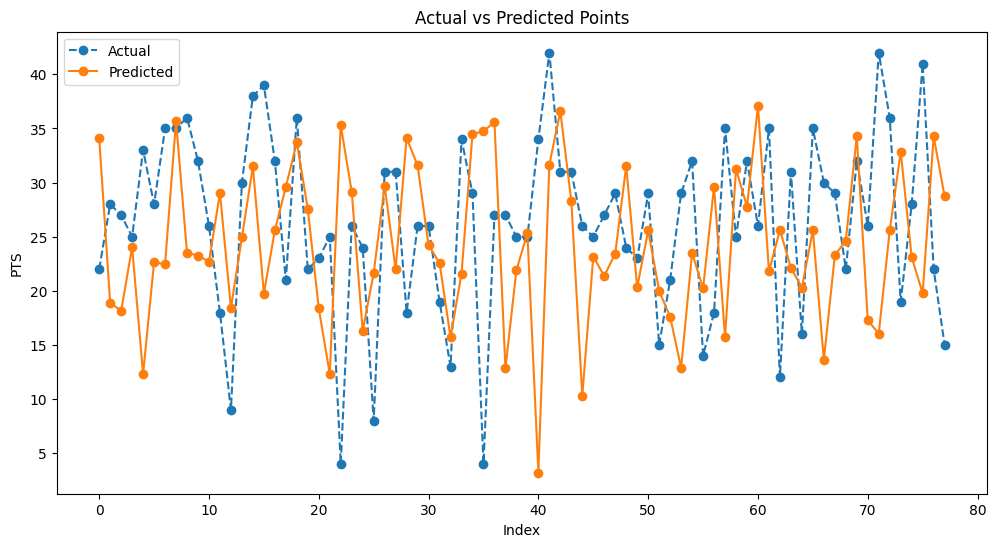

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions.reshape(predictions.shape[0], predictions.shape[1]), label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.6279 - mae: 9.0992  
[54.66126251220703, 9.331799507141113]
552.0892791748047


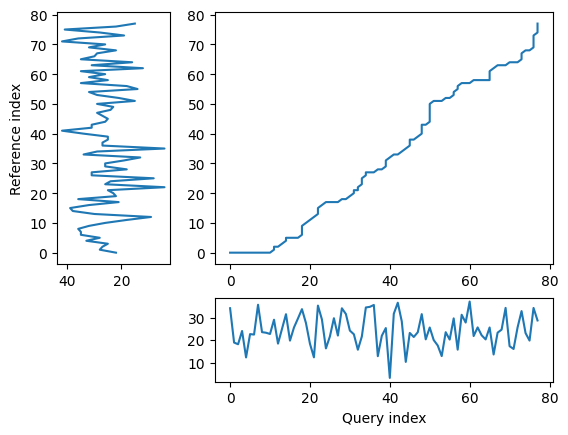

In [16]:
print(Model_CNN.evaluate(X_test, y_test))

from dtw import *

query = predictions.reshape(predictions.shape[0], predictions.shape[1])
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

print(alignment.distance)

In [12]:

from xgboost import XGBRegressor
Model_XGB = XGBRegressor()

for year in range(2021, 2024):
    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1).to_numpy()
    y = dfs[f'Data\\{year}']['PtsNextGame'].to_numpy()

    X = scaler.transform(X)

    X = X.reshape((X.shape[0], X.shape[1]))
    y = y.reshape(y.shape[0], 1)

    Model_XGB.fit(X, y)

Model_XGB.save_model('Models/Model_XGB.bin')

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:28:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [20]:
X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))  # Shape: (samples, time_steps, features)

y_test = dfs['Data\\2024']['PtsNextGame']

predictions = Model_XGB.predict(X_test)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


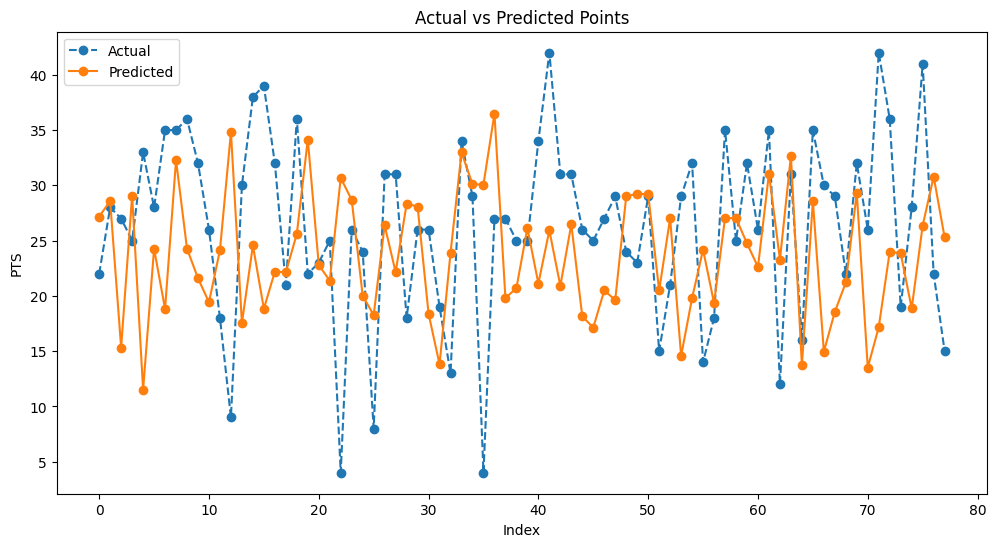

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions, label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

496.5522623062134


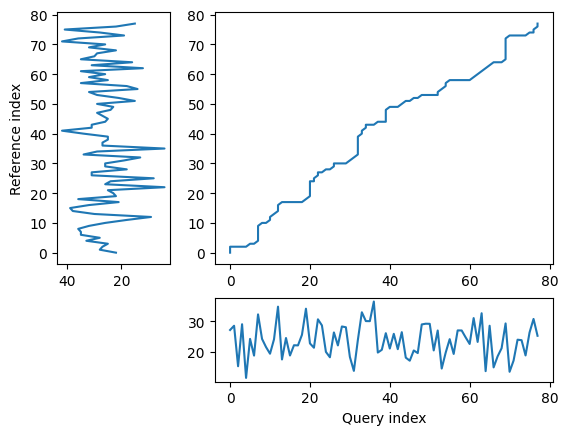

In [25]:
from dtw import *

query = predictions
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

print(alignment.distance)